In [1]:
import pandas as pd
import numpy as np


class Perceptron(object):
    
    def __init__(self, eras=50, threshold=0, eta=0.01):
        self.eras = eras
        self.threshold = threshold
        self.eta = eta
    
    def fit(self, X, Y):
        era=0
        weights = self.weights(len(X[0]))
        errors = np.zeros(len(Y))
        estimates = np.zeros(len(Y))
        J = []
        while era < self.eras:
            row_number = 0
            for row in X:
                f = np.dot(weights, row)
                y_estimate = self.predicate(f)
                if (y_estimate != Y[row_number]):
                    weights = self.weights_update(weights, y_estimate, Y[row_number], row)
                estimates[row_number] = y_estimate
                row_number += 1
            for index in range(0, len(errors)):
                errors[index] = (Y[index] - estimates[index]) ** 2
            J.append(0.5 * np.sum(errors))
            era += 1
        return weights, J
    
    def weights(self, size):
        return np.random.uniform(low=0, high=1, size=(size,))
    
    def predicate(self, f):
        return 1 if f>self.threshold else 0
    
    def weights_update(self, weights, y_estimate, y_actual, X_row):
        for index in range(0, len(X_row)):
            weights[index] = weights[index] + self.eta*(y_actual-y_estimate)*X_row[index]
        return weights
    

In [2]:
df = pd.read_csv('iris.data', header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


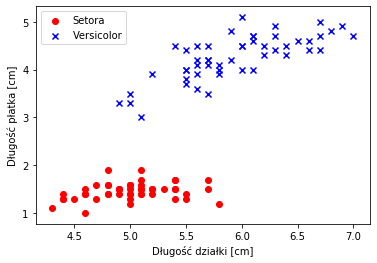

In [4]:
import matplotlib.pyplot as plt

# Odmiana setosa i versicolor
Y = df.iloc[0:100, 4].values
Y = np.where(Y == 'Iris-setosa', 0, 1)
# długość działki i płatk
X = df.iloc[0:100, [0, 2]].values

plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='Setora')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='Versicolor')
plt.xlabel('Długość działki [cm]')
plt.ylabel('Długość płatka [cm]')
plt.legend(loc='upper left')
plt.show()



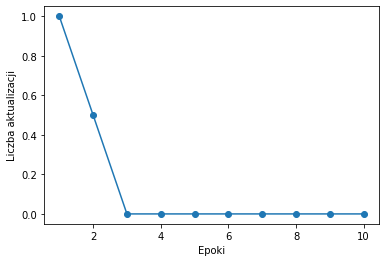

In [5]:
perceptron = Perceptron(eta=0.1, eras=10)
weights, errors = perceptron.fit(X, Y)
plt.plot(range(1, len(errors) + 1), errors, marker='o')
plt.xlabel('Epoki')
plt.ylabel('Liczba aktualizacji')
plt.show()